# Práctica 6

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## 1. Support Vector Machines

### 1.1 Kernel lineal

In [3]:
mat = loadmat('ex6data1.mat')
X = mat.get("X")
y = mat.get("y")

In [4]:
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


In [5]:
def plot_data(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.figure()
    plt.scatter(X[pos,0], X[pos,1], color='black', marker='+', label = 'y = 1')
    plt.scatter(X[neg,0], X[neg,1], color='yellow', marker='o', label = 'y = 0')
    plt.legend(loc = 'best', bbox_to_anchor=(1,1))

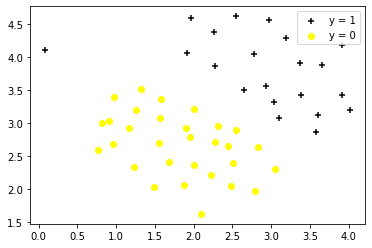

In [6]:
plot_data(X, y)

In [7]:
def visualize_boundary(X, y, svm):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    
    #x1 = np.linspace(X[:, 0].min(). X[:, 0].max(), 100)
    #x1 = np.linspace(X[:, 1].min(). X[:, 1].max(), 100)
    #x1, x2 =np.meshgrid(x1, x2)
    
    yp = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plot_data(X, y)
    plt.contour(xx1, xx2, yp)
    plt.close

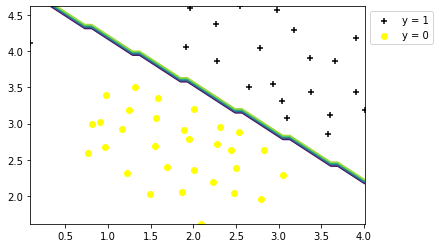

In [8]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

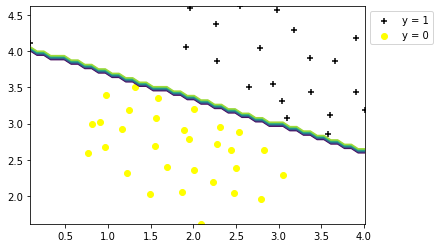

In [9]:
svm = SVC(kernel='linear', C=100.0)
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

### 1.2 Kernel Gaussiano

In [10]:
mat = loadmat('ex6data2.mat')
X = mat.get("X")
y = mat.get("y")

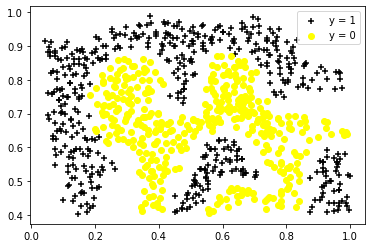

In [11]:
plot_data(X, y)

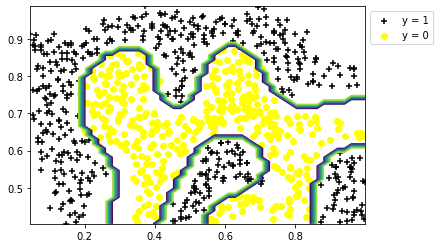

In [12]:
sigma=0.1
svm = SVC(kernel='rbf', C=1.0, gamma = 1/(2*sigma**2))
svm.fit(X,y.ravel())
visualize_boundary(X, y, svm)

### 1.3 Elección de los parámetros C y sigma

In [20]:
mat = loadmat('ex6data3.mat')
X = mat.get("X")
y = mat.get("y")
Xval = mat.get("Xval")
yval = mat.get("yval")

In [21]:
print(X.shape)
print(y.shape)
print(Xval.shape)
print(yval.shape)

(211, 2)
(211, 1)
(200, 2)
(200, 1)


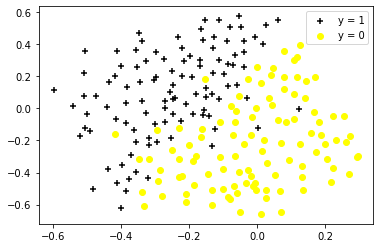

In [22]:
plot_data(X, y)

In [25]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

bestC = 0.01
bestSigma = 0.01
bestScore = -1


for c in C_vec:
    for sigma in sigma_vec:
        gamma = 1/(2*sigma **2)
        aux_kernel = SVC(C = c, kernel = 'rbf', gamma = gamma)
        aux_kernel.fit(X, y.ravel())
        score = aux_kernel.score(Xval, yval)
        if(score > bestScore):
            bestC = c
            bestSigma = sigma
            bestScore = score

print("Best score: ", bestScore)
print("Best sigma: ", bestSigma)
print("Best C:", bestC)
        

Best score:  0.965
Best sigma:  0.1
Best C: 1


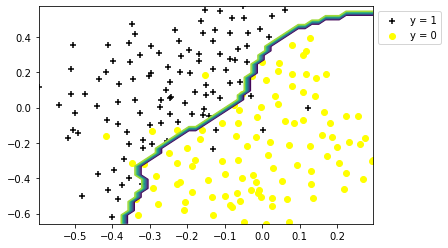

In [28]:
gamma = 1/(2*bestSigma **2)
svm = SVC(C = bestC, kernel = 'rbf', gamma = gamma)
svm.fit(X, y.ravel())
visualize_boundary(X, y, svm)

## 2. Detección de spam

In [78]:
import codecs
from process_email import email2TokenList, preProcess
from get_vocab_dict import getVocabDict

from sklearn.model_selection import train_test_split

In [33]:
# obtención de vocabulario

vocab_dict = getVocabDict()
print(vocab_dict)

{'aa': 1, 'ab': 2, 'abil': 3, 'abl': 4, 'about': 5, 'abov': 6, 'absolut': 7, 'abus': 8, 'ac': 9, 'accept': 10, 'access': 11, 'accord': 12, 'account': 13, 'achiev': 14, 'acquir': 15, 'across': 16, 'act': 17, 'action': 18, 'activ': 19, 'actual': 20, 'ad': 21, 'adam': 22, 'add': 23, 'addit': 24, 'address': 25, 'administr': 26, 'adult': 27, 'advanc': 28, 'advantag': 29, 'advertis': 30, 'advic': 31, 'advis': 32, 'ae': 33, 'af': 34, 'affect': 35, 'affili': 36, 'afford': 37, 'africa': 38, 'after': 39, 'ag': 40, 'again': 41, 'against': 42, 'agenc': 43, 'agent': 44, 'ago': 45, 'agre': 46, 'agreement': 47, 'aid': 48, 'air': 49, 'al': 50, 'alb': 51, 'align': 52, 'all': 53, 'allow': 54, 'almost': 55, 'alon': 56, 'along': 57, 'alreadi': 58, 'alsa': 59, 'also': 60, 'altern': 61, 'although': 62, 'alwai': 63, 'am': 64, 'amaz': 65, 'america': 66, 'american': 67, 'among': 68, 'amount': 69, 'amp': 70, 'an': 71, 'analysi': 72, 'analyst': 73, 'and': 74, 'ani': 75, 'anim': 76, 'announc': 77, 'annual': 78, '

In [34]:
# lectura de fichero ignorando caracteres que no estén en UTF-8

email_contents = codecs.open(
                'spam/0001.txt', 'r',
                encoding='utf-8', errors='ignore').read()

email_contents

'From 12a1mailbot1@web.de  Thu Aug 22 13:17:22 2002\nReturn-Path: <12a1mailbot1@web.de>\nDelivered-To: zzzz@localhost.example.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.example.com (Postfix) with ESMTP id 136B943C32\n\tfor <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)\nReceived: from mail.webnote.net [193.120.211.219]\n\tby localhost with POP3 (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)\nReceived: from dd_it7 ([210.97.77.167])\n\tby webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623\n\tfor <zzzz@example.com>; Thu, 22 Aug 2002 13:09:41 +0100\nFrom: 12a1mailbot1@web.de\nReceived: from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);\n\t Sat, 24 Aug 2002 09:42:10 +0900\nTo: <dcek1a1@netsgo.com>\nSubject: Life Insurance - Why Pay More?\nDate: Wed, 21 Aug 2002 20:31:57 -1600\nMIME-Version: 1.0\nMessage-ID: <0103c1042001882DD_IT7@dd_it7>\nContent-Type: text/html; charset="

In [35]:
# obtención de lista de tokens

token_list = email2TokenList (email_contents)
token_list

['save',
 'up',
 'to',
 'number',
 'on',
 'life',
 'insur',
 'whi',
 'spend',
 'more',
 'than',
 'you',
 'have',
 'to',
 'life',
 'quot',
 'save',
 'ensurin',
 'g',
 'your',
 'famili',
 's',
 'financi',
 'secur',
 'is',
 'veri',
 'import',
 'life',
 'quot',
 'save',
 'ma',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'and',
 'afford',
 'we',
 'provid',
 'free',
 'access',
 'to',
 'the',
 'veri',
 'best',
 'compani',
 'and',
 'the',
 'lowest',
 'rate',
 'life',
 'quot',
 'save',
 'is',
 'fast',
 'ea',
 'y',
 'and',
 'save',
 'you',
 'money',
 'let',
 'us',
 'help',
 'you',
 'get',
 'start',
 'with',
 'the',
 'best',
 'val',
 'ue',
 'in',
 'the',
 'countri',
 'on',
 'new',
 'coverag',
 'you',
 'can',
 'save',
 'hundr',
 'or',
 'even',
 'tho',
 'usand',
 'of',
 'dollar',
 'by',
 'request',
 'a',
 'free',
 'quot',
 'from',
 'lifequot',
 'save',
 'our',
 'servic',
 'will',
 'take',
 'you',
 'less',
 'than',
 'number',
 'minut',
 'to',
 'complet',
 'shop',
 'an',
 'd',
 'compar',
 'save',
 '

In [36]:
# obtención de índices de palabras presentes en el vocabulario

vocab_indices = [vocab_dict[token] for token in token_list if token in vocab_dict ]
vocab_indices

[1452,
 1760,
 1699,
 1120,
 1171,
 953,
 853,
 1571,
 1064,
 1663,
 1893,
 756,
 1699,
 953,
 1353,
 1452,
 1895,
 614,
 645,
 1467,
 877,
 1788,
 822,
 953,
 1353,
 1452,
 986,
 953,
 853,
 1517,
 74,
 37,
 1819,
 1334,
 681,
 11,
 1699,
 1666,
 1788,
 176,
 321,
 74,
 1666,
 984,
 1359,
 953,
 1353,
 1452,
 877,
 617,
 500,
 74,
 1452,
 1893,
 947,
 1766,
 771,
 1893,
 708,
 1584,
 1860,
 1666,
 176,
 825,
 1666,
 374,
 1171,
 1099,
 379,
 1893,
 238,
 1452,
 802,
 1182,
 571,
 1162,
 477,
 227,
 1405,
 681,
 1353,
 688,
 1452,
 1191,
 1493,
 1852,
 1636,
 1893,
 945,
 1663,
 1120,
 1048,
 1699,
 328,
 1507,
 71,
 322,
 1452,
 1760,
 1699,
 1120,
 1171,
 53,
 1741,
 1162,
 953,
 853,
 298,
 775,
 666,
 1895,
 681,
 1353,
 1330,
 1895,
 614,
 877,
 1666,
 176,
 869,
 1893,
 965,
 997,
 810,
 1893,
 825,
 1162,
 1676,
 530,
 825,
 560,
 74,
 1182,
 1859,
 1699,
 162,
 1398,
 688,
 1191,
 961,
 1264,
 298,
 775,
 74,
 1741,
 1398,
 810,
 1893,
 1409,
 825,
 75,
 1585,
 1840,
 992,
 666

In [37]:
# obtención del vector de atributos

n = len(vocab_dict)
feature_vector = np.zeros((n,1))
for idx in vocab_indices:
    feature_vector[idx-1] = 1

print(feature_vector[70:80])

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [43]:
def email2FeatureVector(email_contents, vocab_dict):
    # obtención de lista de tokens
    token_list = email2TokenList (email_contents)
    
    # obtención de índices de palabras presentes en el vocabulario
    vocab_indices = [vocab_dict[token] for token in token_list if token in vocab_dict ]
    
    # obtención del vector de atributos
    n = len(vocab_dict)
    feature_vector = np.zeros((n,1))
    for idx in vocab_indices:
        feature_vector[idx-1] = 1
        
    return feature_vector;

In [71]:
# para recorrer los emails de un directorio de spam con formato 'dddd.txt'
#m = size del directorio
#n = size de los emails
#label = 1 el direcctorio es de correos spam o 0 si no lo es.
def createData(directorio, m, n, label):
    features = np.zeros((m, n))
    for i in range(1, m+1):
        email_contents = codecs.open(
            '{0}/{1:04d}.txt'.format(directorio, i), 'r',
            encoding='utf-8', errors='ignore').read()
        f=email2FeatureVector(email_contents, vocab_dict)
        features[i-1,:]=f.ravel()
       
    if (label == 1):
        y=np.ones((m, 1))
    elif (label == 0):
        y=np.zeros((m,1))
        
    return features, y

In [74]:
n=1899
mSpam = 500
mEasyHam=2551
mHardHam=250

features_spam, y_spam = createData("spam", mSpam, n, 1)

In [75]:
features_easyHam, y_easyHam = createData("easy_ham", mEasyHam, n, 0)

In [76]:
features_hardHam, y_hardHam = createData("hard_ham", mHardHam, n, 0)

In [79]:
# creación de datos de entrenamiento, validación y test

# Unimos todos los features
X = features_spam
X = np.vstack((X, features_easyHam))
X = np.vstack((X, features_hardHam))

# Unimos todos los labels
y = y_spam
y = np.vstack((y, y_easyHam))
y = np.vstack((y, y_hardHam))

# Hacemos una división en las siguientes partes:

# 60% Entrenamiento (training set)
# 20% Validación (validation set)
# 20% test (test set)


x, xTest, y, yTest = train_test_split(X, y, test_size=0.2, train_size = 0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, train_size=0.75)

In [80]:
print(x_train.shape)
print(y_train.shape)

(1980, 1899)
(1980, 1)


In [81]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

bestC = 0.01
bestSigma = 0.01
bestScore = -1


for c in C_vec:
    for sigma in sigma_vec:
        gamma = 1/(2*sigma **2)
        aux_kernel = SVC(C = c, kernel = 'rbf', gamma = gamma)
        aux_kernel.fit(x_train, y_train.ravel())
        score = aux_kernel.score(x_val, y_val)
        if(score > bestScore):
            bestC = c
            bestSigma = sigma
            bestScore = score

print("Best score: ", bestScore)
print("Best sigma: ", bestSigma)
print("Best C:", bestC)
        

Best score:  0.9833333333333333
Best sigma:  30
Best C: 30
